## Label Encoding

In [2]:
# Label Encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [3]:
# Sample DataFrame
df = pd.DataFrame({
    'Color': ['Red', 'Blue', 'Green', 'Yellow', 'Purple', 'Orange', 'Pink', 'Brown', 'Black', 'White']
})
df

,Color
0,Red
1,Blue
2,Green
3,Yellow
4,Purple
5,Orange
6,Pink
7,Brown
8,Black
9,White


### Use LabelEncoder to convert categorical data into numerical data

In [4]:
# Initialize labelencoder
labelencoder = LabelEncoder()
# Fit and transform the data
# The Color column has been transformed from categorical strings to numerical values
# Each unique color is assigned a unique integer from 0 to n-1
# For example: Black=0, Blue=1, Brown=2, etc.
df['Color'] = labelencoder.fit_transform(df['Color'])

df 


,Color
0,7
1,1
2,3
3,9
4,6
5,4
6,5
7,2
8,0
9,8


### one-hot encoding

In [5]:
#one-hot encoding
# One-hot encoding creates binary columns for each category

df_encoded = pd.get_dummies(df, columns=['Color'])

print(df_encoded) 

   Color_0  Color_1  Color_2  Color_3  Color_4  Color_5  Color_6  Color_7  \
0    False    False    False    False    False    False    False     True   
1    False     True    False    False    False    False    False    False   
2    False    False    False     True    False    False    False    False   
3    False    False    False    False    False    False    False    False   
4    False    False    False    False    False    False     True    False   
5    False    False    False    False     True    False    False    False   
6    False    False    False    False    False     True    False    False   
7    False    False     True    False    False    False    False    False   
8     True    False    False    False    False    False    False    False   
9    False    False    False    False    False    False    False    False   

   Color_8  Color_9  
0    False    False  
1    False    False  
2    False    False  
3    False     True  
4    False    False  
5    False    False 

### Binary Encoding

In [7]:
import category_encoders as ce
# Initialize BinaryEncoder

binary_encoder = ce.BinaryEncoder(cols=['Color'])

# Fit and transform the data

df_encoded = binary_encoder.fit_transform(df)

print(df_encoded)

   Color_0  Color_1  Color_2  Color_3
0        0        0        0        1
1        0        0        1        0
2        0        0        1        1
3        0        1        0        0
4        0        1        0        1
5        0        1        1        0
6        0        1        1        1
7        1        0        0        0
8        1        0        0        1
9        1        0        1        0


### Target encoding

In [8]:
# sample Dataframe
df = pd.DataFrame({
    'Color': ['Red', 'Blue', 'Green', 'Yellow', 'Purple', 'Orange', 'Pink', 'Brown', 'Black', 'White'],
    'Price': [10, 15, 12, 14, 11, 13, 16, 9, 8, 17]
})
df
   

# Initialize targetencoder
target_encoder = ce.TargetEncoder(cols=['Color'])

# fit and transform the data
df_encoded = target_encoder.fit_transform(df[['Color']],df['Price']) 

# add the encoded column to the original dataframe
df['Color_encoded'] = df_encoded
df

,Color,Price,Color_encoded
0,Red,10,12.174729
1,Blue,15,12.825271
2,Green,12,12.434946
3,Yellow,14,12.695163
4,Purple,11,12.304837
5,Orange,13,12.565054
6,Pink,16,12.955380
7,Brown,9,12.044620
8,Black,8,11.914512
9,White,17,13.085488


### Detect Outlier

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.DataFrame({
    'Value': [10, 12, 13, 12, 14, 15, 16, 17, 18, 19, 20, 100]
})
df

,Value
0,10
1,12
2,13
3,12
4,14
5,15
6,16
7,17
8,18
9,19


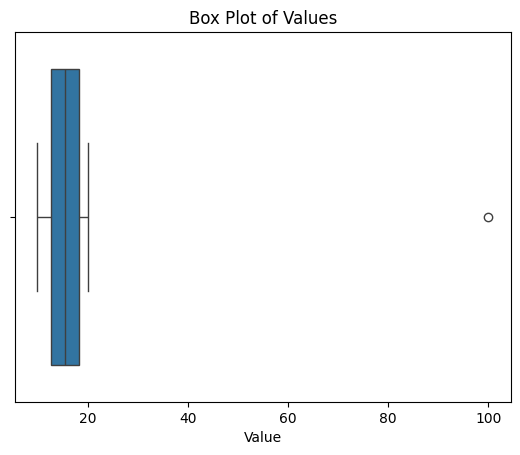

In [10]:
sns.boxplot(x=df['Value'])
plt.title('Box Plot of Values')
plt.show()

### Category Encoders

In [11]:
import category_encoders as ce
import pandas as pd

data = pd.DataFrame({'Country': ['USA', 'Canada', 'UK', 'USA', 'UK']})

encoder = ce.BinaryEncoder(cols=['Country'])

encoded_data = encoder.fit_transform(data)
encoded_data

,Country_0,Country_1
0,0,1
1,1,0
2,1,1
3,0,1
4,1,1
